<a href="https://colab.research.google.com/github/Data-Eyes/Color-Blindness-Detection/blob/main/Color_Blindness_Detection_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os

# Path to your dataset
dataset_path = '/content/drive/MyDrive/color blindness'

# List files to check the structure
os.listdir('/content/drive/MyDrive/color blindness')

Mounted at /content/drive


['color.csv']

In [ ]:
# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/color blindness/color.csv'

# Load the dataset
try:
  import pandas as pd # Indent this line to be part of the 'try' block
  data = pd.read_csv(file_path)
  print(data.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

   Color Name Hex Code    R    G    B
0  Bright Red  #FF0000  255    0    0
1    Dark Red  #8B0000  139    0    0
2   Light Red  #FF6666  255  102  102
3     Crimson  #DC143C  220   20   60
4   Firebrick  #B22222  178   34   34


In [ ]:
data

,Color Name,Hex Code,R,G,B
0,Bright Red,#FF0000,255,0,0
1,Dark Red,#8B0000,139,0,0
2,Light Red,#FF6666,255,102,102
3,Crimson,#DC143C,220,20,60
4,Firebrick,#B22222,178,34,34
...,...,...,...,...,...
2030,Vanilla Latte,#F3E5AB,243,229,171
2031,Velvet Plum,#682860,104,40,96
2032,Vintage Rose,#C08081,192,128,129
2033,Winter Frost,#D5E3EB,213,227,235


In [ ]:
print(data.columns)  # This will list all column names


Index(['Color Name', 'Hex Code', 'R', 'G', 'B'], dtype='object')


In [ ]:
from PIL import Image
import numpy as np

def rgb_to_image(rgb_tuple, size=(100, 100)):
    """Converts an RGB tuple to a PIL Image.

    Args:
        rgb_tuple: A tuple representing the RGB values (R, G, B), each value being an integer between 0 and 255.
        size: A tuple specifying the width and height of the output image.

    Returns:
        A PIL Image object.
    """

    r, g, b = rgb_tuple
    image_array = np.full((size[1], size[0], 3), (r, g, b), dtype=np.uint8)
    image = Image.fromarray(image_array)
    return image


# Example usage (assuming 'data' DataFrame is available):
for index, row in data.iterrows():
  rgb = (row['R'], row['G'], row['B'])
  image = rgb_to_image(rgb)
  # Save or display the image
  image.save(f"color_image_{index}.png")  # Save as a PNG file (you can change the format)
  # Or display:
  # image.show()

In [ ]:
# prompt: save images into color blindness folder

from google.colab import drive
import os
import pandas as pd
from PIL import Image
import numpy as np

drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

# Path to your dataset
dataset_path = '/content/drive/MyDrive/color blindness'

# Create the folder if it doesn't exist
output_folder = os.path.join(dataset_path, 'color_blindness_images')
os.makedirs(output_folder, exist_ok=True)

# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/color blindness/colors.csv'

# Load the dataset
try:
  data = pd.read_csv(file_path)
  print(data.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")


# Load the CSV file without headers (if needed) and set column names
csv_path = "/content/drive/MyDrive/color blindness/color.csv"
df = pd.read_csv(csv_path, header=None)
df.columns = ['color_name', 'hex_code', 'Red', 'Green', 'Blue']

# Function to convert RGB to image
def rgb_to_image(rgb_tuple, size=(100, 100)):
    r, g, b = rgb_tuple
    image_array = np.full((size[1], size[0], 3), (r, g, b), dtype=np.uint8)
    image = Image.fromarray(image_array)
    return image

# Iterate through the DataFrame and save images
for index, row in df.iterrows():  # Use df instead of data
    try:
        rgb = (int(row['Red']), int(row['Green']), int(row['Blue']))
        image = rgb_to_image(rgb)
        image_path = os.path.join(output_folder, f"color_image_{index}.png")
        image.save(image_path)
        print(f"Saved image: {image_path}")
    except (ValueError, TypeError) as e:
        print(f"Error processing row {index}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive
Error: File not found at /content/drive/MyDrive/color blindness/colors.csv. Please check the path.
Error processing row 0: invalid literal for int() with base 10: 'R'
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_1.png
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_2.png
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_3.png
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_4.png
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_5.png
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_6.png
Saved image: /content/drive/MyDrive/color blindness/color_blindness_images/color_image_7.png
Saved image: /content/drive

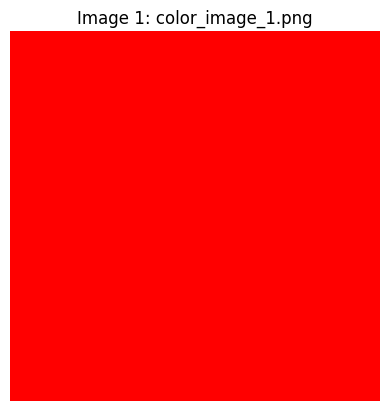

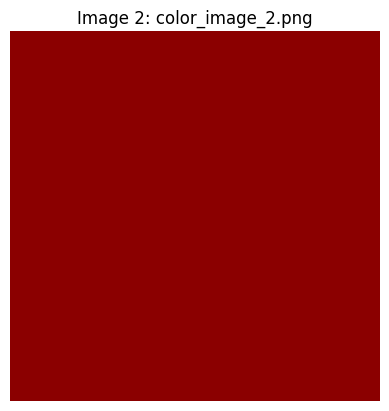

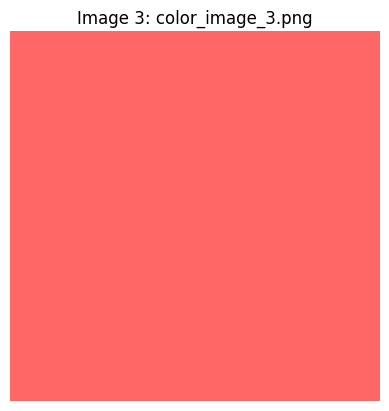

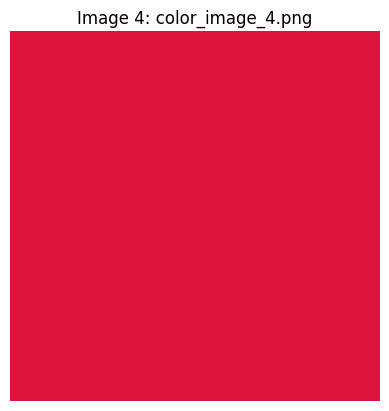

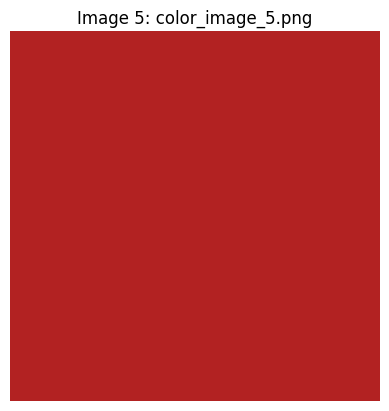

In [ ]:
# prompt: check images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'output_folder' is defined as in your previous code
output_folder = '/content/drive/MyDrive/color blindness/color_blindness_images'

# List all image files in the output folder
image_files = [f for f in os.listdir(output_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display the first few images
for i, image_file in enumerate(image_files[:5]):  # Display the first 5 images
    image_path = os.path.join(output_folder, image_file)
    try:
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(f"Image {i+1}: {image_file}")
        plt.axis('off')  # Hide axes
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while displaying image {image_file}: {e}")


In [ ]:
# prompt: check total images

import os

# Assuming 'output_folder' is defined as in your previous code
output_folder = '/content/drive/MyDrive/color blindness/color_blindness_images'

# Count the number of image files in the folder
image_count = 0
for filename in os.listdir(output_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Include more image extensions if needed
        image_count += 1

print(f"Total number of images in the folder: {image_count}")


Total number of images in the folder: 2035


In [ ]:
# prompt: split test and train

import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data (assuming 'df' is your DataFrame)
# Replace 'your_data.csv' with your actual file path if needed
# df = pd.read_csv('your_data.csv')

# Assuming 'df' contains your image data and a 'label' column
# If your labels are in a separate file, load them appropriately
# and merge them with your image data

# Define features (X) and target variable (y)
X = df.drop('color_name', axis=1)  # Replace 'label' with the actual column name for labels
y = df['color_name']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #set random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1628, 4)
Testing data shape: (408, 4)


In [ ]:
!pip install tensorflow
!pip install keras
!pip install opencv-python
!pip install scikit-learn
!pip install pandas

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split


# Function to load images
def load_images_from_dataframe(df, img_height, img_width, image_path_column='/content/drive/MyDrive/color blindness/color_blindness_images'):
    """
    Loads images from a DataFrame where a column contains image paths.

    Args:
        df: pandas DataFrame containing a column with image paths.
        img_height: Desired height of the loaded images.
        img_width: Desired width of the loaded images.
        image_path_column: The name of the column in the DataFrame
                          that contains the image paths (default: 'image_path').

    Returns:
        A NumPy array containing the loaded and preprocessed images.
    """
    images = []
    for index, row in df.iterrows():
        image_path = row[image_path_column]  # Get image path from the specified column
        try:
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (img_width, img_height))
            img = img / 255.0  # Normalize pixel values
            images.append(img)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    return np.array(images)


# --- Data Loading and Preprocessing ---

# 1. Load your CSV file into a pandas DataFrame (df)
# Replace 'your_csv_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/drive/MyDrive/color blindness/color.csv')

# 2. Assuming your DataFrame has a column named 'image_path'
# If not, replace 'image_path' with the actual column name in your DataFrame
# that contains the paths to the images.
# (Example: df['image_path'] = '/path/to/images/' + df['image_filename'])


# --- Splitting Data ---
X = df.drop('Color Name', axis=1)  # Changed 'color_name' to 'Color Name'
y = df['Color Name']             # Changed 'color_name' to 'Color Name'


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Image Loading and Preprocessing ---
img_height, img_width = 224, 224  # Adjust as needed for MobileNetV2
X_train_images = load_images_from_dataframe(X_train, img_height, img_width)
X_test_images = load_images_from_dataframe(X_test, img_height, img_width)


# --- Label Encoding ---
le = LabelEncoder()
all_labels = pd.concat([y_train, y_test], axis=0)
le.fit(all_labels)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
num_classes = len(le.classes_)


# --- Model Building ---
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


# --- Model Compilation ---
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# --- Model Training ---
model.fit(X_train_images, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_images, y_test_encoded))


# --- Model Evaluation ---
loss, accuracy = model.evaluate(X_test_images, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

KeyError: '/content/drive/MyDrive/color blindness/color_blindness_images'

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ✅ Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# ✅ Freeze Base Model Layers
base_model.trainable = False  # Initially freeze the model

# ✅ Add Custom Layers on Top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features to a 1D vector
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)  # Dropout to prevent overfitting
output_layer = Dense(1, activation='sigmoid')  # Binary classification (0 or 1)

# ✅ Create Final Model
# The output_layer needs to be called with the previous layer's output to create a KerasTensor
predictions = output_layer(x)
model = Model(inputs=base_model.input, outputs=predictions) # Use 'predictions' as the output

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# ✅ Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# ✅ Save the Model
model.save("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7152 - loss: 0.4997 - val_accuracy: 1.0000 - val_loss: 0.0235
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_l

In [ ]:
import keras.saving
keras.saving.save_model(model, "my_model.keras")


In [ ]:
# prompt: build model comile metrices

# Compile the model with additional metrics
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC']) # Added metrics


In [ ]:
# prompt: train or evaluae the model

# Evaluate the model
# Get the returned values (loss and accuracy)
evaluation_results = model.evaluate(test_generator)

# Extract values based on the returned structure
loss = evaluation_results[0]  # Assuming loss is the first element
accuracy = evaluation_results[1] # Assuming accuracy is the second element

# If the model was compiled with additional metrics,
# you can access them by their position in the list (if you know the order)
# However, it's safer to recompile your model with those metrics.


print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
#  print(f"Test Precision: {precision}")
#  print(f"Test Recall: {recall}")
#  print(f"Test AUC: {auc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0011
Test Loss: 0.0011022236431017518
Test Accuracy: 1.0


In [ ]:
# prompt: train or evaluate the model to buld model complied metrice

# Evaluate the model with the added metrics
evaluation_results = model.evaluate(test_generator)

# Assuming the order of metrics in evaluation_results matches the order in model.compile
loss = evaluation_results[0]
accuracy = evaluation_results[1]

# Check if evaluation_results contains the additional metrics
if len(evaluation_results) > 2:
    precision = evaluation_results[2]
    recall = evaluation_results[3]
    auc = evaluation_results[4]

    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test AUC: {auc}")
else:
    print("Additional metrics (precision, recall, AUC) not found in evaluation results.")
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0011
Additional metrics (precision, recall, AUC) not found in evaluation results.
Test Loss: 0.0011022236431017518
Test Accuracy: 1.0


Saving landscape_of_yellow_flowers_and_blue_mountain_lake_hills_under_red_cloud_sunset_4k_hd_nature.jpg to landscape_of_yellow_flowers_and_blue_mountain_lake_hills_under_red_cloud_sunset_4k_hd_nature.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


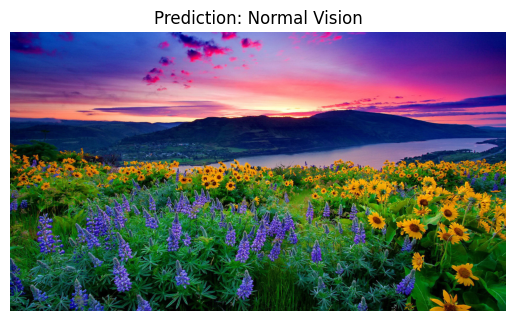

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files
import matplotlib.pyplot as plt

# ✅ Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# ✅ Recompile the model to restore metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Upload an image for testing
uploaded = files.upload()

for filename in uploaded.keys():
    # ✅ Read and preprocess the image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV loads in BGR)
    img = cv2.resize(img, (224, 224))  # Resize to MobileNetV2 input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # ✅ Make a prediction
    prediction = model.predict(img)
    predicted_class = "Color Blind" if prediction[0][0] > 0.5 else "Normal Vision"

    # ✅ Display the image and prediction
    plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class}")
    plt.show()


In [ ]:
# ✅ Load Best Model (if needed)
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# ✅ Evaluate on Test Data
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0011
✅ Test Accuracy: 100.00%


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# ✅ Load Best Model
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# ✅ Recompile the model (restore metrics)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Define both dataset paths
color_blindness_folder = '/content/drive/MyDrive/color blindness/color_blindness_images'



# ✅ Load & preprocess images from both folders
all_images, all_labels = load_and_preprocess_images([color_blindness_folder])

# ✅ Split dataset (Training: 70%, Validation: 15%, Test: 15%)
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Normalize test images (if not done before)
X_test = X_test / 255.0  # Ensure test images are in the same scale as training

# Assuming 'X_test' contains your test images
test_images = X_test  # Assign X_test to test_images

predictions = model.predict(test_images)  # Get raw sigmoid outputs
predicted_labels = (predictions > 0.5).astype(int)  # Convert to 0/1

In [ ]:
import tensorflow as tf
import absl.logging

# Suppress the warning if not critical
absl.logging.set_verbosity(absl.logging.ERROR)

# ✅ Load the model (modify the path as needed)
# Replace 'your_model_path.h5' with the correct path to your saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# Recompile the model to ensure metrics are built
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ensure the model is trained/evaluated before using it
try:
    loss, acc = model.evaluate(val_generator, verbose=1)
    print(f"Model Accuracy: {acc:.2f}")
except Exception as e:
    print(f"Evaluation Error: {e}")

# Make predictions (ensure correct input shape)
import numpy as np
img = np.random.rand(1, 224, 224, 3)  # Replace with actual preprocessed image
prediction = model.predict(img)

# If classification, convert to label
predicted_label = np.argmax(prediction)  # Use argmax for multi-class problems

print(f"Predicted Label: {predicted_label}")

Evaluation Error: name 'val_generator' is not defined
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: 0


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Suppress TensorFlow warnings (Optional)
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5')

# Compile the model again to ensure metrics are set
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ensure the model is working by checking its summary
model.summary()

def preprocess_image(img_path, target_size=(224, 224)):
    """Loads and preprocesses an image for prediction."""
    img = image.load_img(img_path, target_size=target_size)  # Load image using keras.preprocessing.image
    img_array = image.img_to_array(img)                      # Convert to array
    img_array = np.expand_dims(img_array, axis=0)            # Expand dimensions
    img_array = img_array / 255.0                            # Normalize
    return img_array

# Provide an actual image path here
img_path = "your_image.jpg"  # Replace with an actual image path if available
input_image = preprocess_image(img_path)

# Make a prediction
prediction = model.predict(input_image)

# If classification, get predicted class index
predicted_label = np.argmax(prediction)  # Use argmax for multi-class classification

print(f"Predicted Label: {predicted_label}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

FileNotFoundError: [Errno 2] No such file or directory: 'your_image.jpg'

Saving colorpic.jpg to colorpic.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


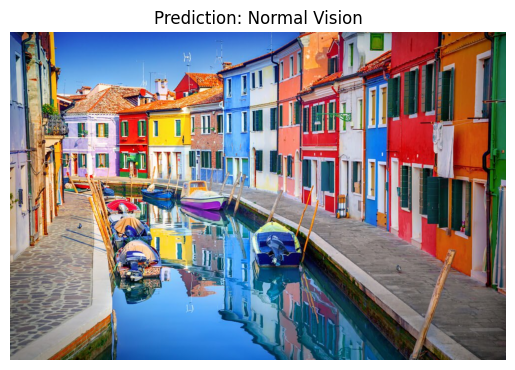

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files
import matplotlib.pyplot as pltimport tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Suppress TensorFlow warnings (Optional)
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5')

# Compile the model again to ensure metrics are set
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ensure the model is working by checking its summary
model.summary()

# Load and preprocess an image for prediction
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)                      # Convert to array
    img_array = np.expand_dims(img_array, axis=0)            # Expand dimensions
    img_array = img_array / 255.0                            # Normalize
    return img_array

# Provide an actual image path here
img_path = "your_image.jpg"  # Replace with an actual image path if available
input_image = preprocess_image(img_path)

# Make a prediction
prediction = model.predict(input_image)

# If classification, get predicted class index
predicted_label = np.argmax(prediction)  # Use argmax for multi-class classification

print(f"Predicted Label: {predicted_label}")

# ✅ Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# ✅ Recompile the model to restore metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Upload an image for testing
uploaded = files.upload()

for filename in uploaded.keys():
    # ✅ Read and preprocess the image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV loads in BGR)
    img = cv2.resize(img, (224, 224))  # Resize to MobileNetV2 input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # ✅ Make a prediction
    prediction = model.predict(img)
    predicted_class = "Color Blind" if prediction[0][0] > 0.5 else "Normal Vision"

    # ✅ Display the image and prediction
    plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class}")
    plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# ✅ Load Best Model
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# ✅ Recompile the model (restore metrics)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Load & preprocess images
ordered_folder = '/content/drive/MyDrive/color blindness/dataset/ordered/'
color_blindness_folder = '/content/drive/MyDrive/color blindness/color_blindness_images/'

# Function to load images (ensure it's correctly implemented)
all_images, all_labels = load_and_preprocess_images([ordered_folder, color_blindness_folder])

# ✅ Split dataset (Training: 70%, Validation: 15%, Test: 15%)
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Normalize test images (if not done before)
X_test = X_test / 255.0  # Ensure test images are in the same scale as training

# ✅ Evaluate Model on Test Data
y_pred_prob = model.predict(X_test)  # Get model predictions
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary class labels

# ✅ Convert true labels to NumPy array (if not already)
y_true = np.array(y_test)

# ✅ Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# ✅ Print evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/6
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/7
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/4
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/5
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/3
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/8
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/9
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/2
Skipping invalid image: /content/drive/MyDrive/color blindness/dataset/ordered/1
Skipping invalid image: /content/drive/MyDrive/color blindness/color_blindness_images/air_force_blue_usaf
Skipping invalid image: /content/drive/MyDrive/color blindness/color_blindness_images/air_superiority_blue
Skipping invalid image: /content/drive/MyDrive/color blind

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
print("Class distribution in test set:", np.bincount(y_test))


Class distribution in test set: [130]


In [ ]:
def load_and_preprocess_images(folders):
    images = []
    labels = []
    for folder in folders:
        for label, folder_name in enumerate(os.listdir(folder)):
            folder_path = os.path.join(folder, folder_name)
            if os.path.isdir(folder_path):
                for img_name in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_name)
                    try:
                        img = cv2.imread(img_path)
                        img = cv2.resize(img, (224, 224))  # Resize image
                        images.append(img)
                        labels.append(label)
                    except Exception as e:
                        print(f"Skipping invalid image: {img_path}")
                        continue
    return np.array(images), np.array(labels)


In [ ]:
print("Prediction probabilities:\n", y_pred_prob)

Prediction probabilities:
 [[0.00052283]
 [0.00052339]
 [0.00052377]
 [0.00052297]
 [0.00052251]
 [0.00052268]
 [0.00052191]
 [0.00052486]
 [0.00052263]
 [0.00052302]
 [0.00052227]
 [0.00052292]
 [0.000523  ]
 [0.00052421]
 [0.00052227]
 [0.0005243 ]
 [0.00052262]
 [0.00052305]
 [0.00052334]
 [0.00052324]
 [0.00052252]
 [0.00052209]
 [0.00052258]
 [0.00052245]
 [0.00052444]
 [0.00052413]
 [0.00052241]
 [0.00052313]
 [0.00052224]
 [0.0005231 ]
 [0.0005227 ]
 [0.00052345]
 [0.00052262]
 [0.00052234]
 [0.00052313]
 [0.0005235 ]
 [0.00052318]
 [0.00052353]
 [0.00052302]
 [0.00052333]
 [0.0005222 ]
 [0.00052167]
 [0.0005234 ]
 [0.00052323]
 [0.00052314]
 [0.00052256]
 [0.00052229]
 [0.00052303]
 [0.00052222]
 [0.00052287]
 [0.00052298]
 [0.00052226]
 [0.00052299]
 [0.00052305]
 [0.00052427]
 [0.0005225 ]
 [0.00052304]
 [0.0005238 ]
 [0.00052246]
 [0.00052367]
 [0.00052344]
 [0.00052349]
 [0.00052343]
 [0.00052197]
 [0.0005228 ]
 [0.00052193]
 [0.00052355]
 [0.00052291]
 [0.00052349]
 [0.000

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found at: /content/drive/MyDrive/color blindness/color_blindness_images/american_rose/color_image_10.png


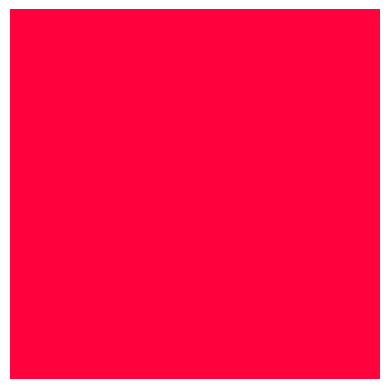

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive if not already mounted
drive.mount('/content/drive')

# Define the path to the image
image_path = '/content/drive/MyDrive/color blindness/color_blindness_images/american_rose/color_image_10.png'

# Check if the path exists
if os.path.exists(image_path):
    print(f"File found at: {image_path}")

    # Try loading the image with OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not load image")
    else:
        # Display the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axes for a cleaner view
        plt.show()

else:
    print(f"Error: The file does not exist at the path {image_path}. Please check the path.")


Found 46 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Detected 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 53s 13s/step - accuracy: 0.4873 - loss: 1.1052 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 8.8406e-04 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 1.0000 - loss: 5.5502e-05 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step - accuracy: 1.0000 - loss: 1.1921e-07
Test Accuracy: 1.00


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix:
 [[10]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


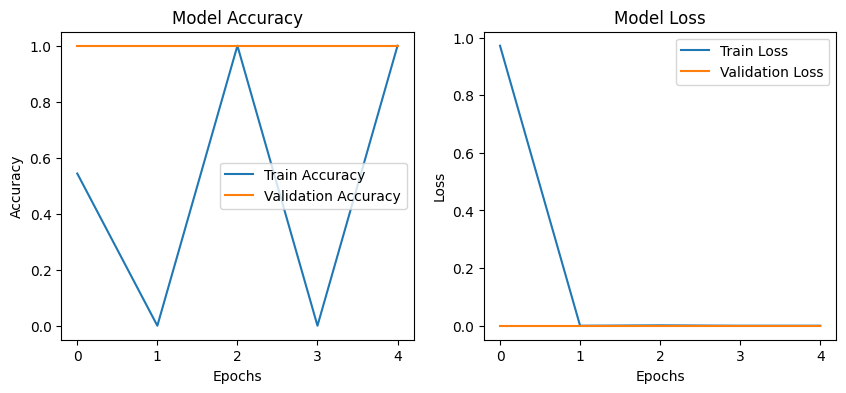

In [ ]:
Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enable XLA (Just-In-Time Compilation for Faster Computation)
tf.config.optimizer.set_jit(True)

# Enable Mixed Precision Training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/color blindness/dataset/',
    target_size=(96, 96), batch_size=32, class_mode='categorical', subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/color blindness/dataset/',
    target_size=(96, 96), batch_size=32, class_mode='categorical', subset='validation'
)

# Get number of classes dynamically
num_classes = train_generator.num_classes
print(f"Detected {num_classes} classes.")

# Convert to tf.data.Dataset with limited iterations
def dataset_from_generator(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: (x for x in generator),  # Fixing Infinite Loop
        output_signature=(
            tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
        )
    )
    return dataset.take(len(generator))  # Ensuring It Stops

# Create Dataset with Proper Termination
train_data = dataset_from_generator(train_generator).prefetch(tf.data.AUTOTUNE)
val_data = dataset_from_generator(val_generator).prefetch(tf.data.AUTOTUNE)

# Load MobileNetV2
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Unfreeze Last 20 Layers for Training
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Build Model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Select Loss Function
loss_function = 'binary_crossentropy' if num_classes == 2 else 'categorical_crossentropy'

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=loss_function, metrics=['accuracy'], jit_compile=True)

# Train Model with Steps Limited (Prevents Infinite Loop)
history = model.fit(train_data, epochs=5, validation_data=val_data, steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

# Evaluate Model
test_loss, test_acc = model.evaluate(val_data)
print(f'Test Accuracy: {test_acc:.2f}')

# Get Predictions & True Labels
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.array(val_generator.classes)

# Classification Report & Confusion Matrix
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

# Plot Training History
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# Enable Mixed Precision
mixed_precision.set_global_policy('mixed_float16')

# Data Preprocessing with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/color blindness/dataset/',
    target_size=(96, 96), batch_size=32, class_mode='categorical', subset='training'
)

val_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/color blindness/dataset/',
    target_size=(96, 96), batch_size=32, class_mode='categorical', subset='validation'
)

num_classes = train_data.num_classes
print(f"Detected {num_classes} classes.")

# Load Pretrained Model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False  # Freeze the layers

# Custom Model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_data, epochs=10, validation_data=val_data)

# Evaluate Model
test_loss, test_acc = model.evaluate(val_data)
print(f'Test Accuracy: {test_acc:.2f}')


Found 46 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Detected 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5643 - loss: 8.1087 - val_accuracy: 1.0000 - val_loss: 7.6379
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7215 - loss: 7.7626 - val_accuracy: 1.0000 - val_loss: 7.3211
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.9472 - loss: 7.4448 - val_accuracy: 1.0000 - val_loss: 7.2233
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 1.0000 - loss: 7.2262 - val_accuracy: 1.0000 - val_loss: 7.1623
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.9710 - loss: 7.1976 - val_accuracy: 1.0000 - val_loss: 7.1139
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 995ms/step - accuracy: 0.9710 - loss: 7.1831 - val_accuracy: 1.0000 - val_loss: 7.0890
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 7.1075 - val_accuracy: 1.0000 - val_loss: 7.0403
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 981ms/step - accuracy: 0.9751 - loss: 7.0766 - val_accuracy: 1.0000 - val_loss: 6.9920
Epoch 9/1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,660 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,230 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu 

Saving landscape_of_yellow_flowers_and_blue_mountain_lake_hills_under_red_cloud_sunset_4k_hd_nature.jpg to landscape_of_yellow_flowers_and_blue_mountain_lake_hills_under_red_cloud_sunset_4k_hd_nature (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: Normal Vision
Scene Description: a field of flowers
Numbers Detected: No numbers detected
Problematic Colors: No problematic colors detected


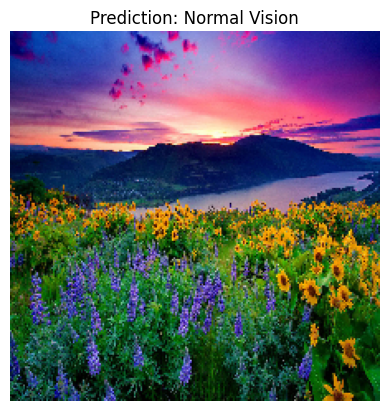

In [ ]:
import cv2
import numpy as np
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"
!pip install easyocr
import easyocr
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from google.colab import files
import matplotlib.pyplot as plt
from gtts import gTTS
import IPython.display as ipd
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load OCR models
easyocr_reader = easyocr.Reader(["en"])
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Load Image Captioning Model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load Color Blindness Detection Model
color_blind_model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

def describe_image(img):
    """Generate a textual description of an image."""
    inputs = processor(images=img, return_tensors="pt")
    caption = caption_model.generate(**inputs)
    return processor.decode(caption[0], skip_special_tokens=True)

def detect_numbers(img):
    """Detect numbers in an image using OCR."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray, config='digits')
    if not text.strip():
        text = easyocr_reader.readtext(gray, detail=0)
    return text if text else "No numbers detected"

def identify_problematic_colors(img, color_blindness_type):
    """Identify colors that a color-blind user may struggle with."""
    color_deficiency_map = {
        "Protanopia": ["Red", "Brown", "Pink"],
        "Deuteranopia": ["Green", "Yellow"],
        "Tritanopia": ["Blue", "Purple"]
    }

    detected_colors = []  # Extract dominant colors in the image
    reshaped = img.reshape((-1, 3))
    unique_colors, counts = np.unique(reshaped, axis=0, return_counts=True)
    top_colors = unique_colors[np.argsort(-counts)[:3]]  # Get top 3 colors

    problem_colors = color_deficiency_map.get(color_blindness_type, [])

    color_warnings = [color for color in problem_colors if color in detected_colors]
    return color_warnings if color_warnings else "No problematic colors detected"

def text_to_speech(text):
    """Convert text to speech and play the output."""
    tts = gTTS(text)
    tts.save("output.mp3")
    return ipd.Audio("output.mp3")

def process_uploaded_image():
    """Handle image input from user, process it, and return results."""
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = cv2.imread(filename)
        img = cv2.resize(img, (224, 224))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_norm = img_rgb / 255.0
        img_expanded = np.expand_dims(img_norm, axis=0)

        # Run the color blindness model
        prediction = color_blind_model.predict(img_expanded)
        color_blindness_result = "Color Blind" if prediction[0][0] > 0.5 else "Normal Vision"

        # Generate scene description
        scene_description = describe_image(img_rgb)

        # Detect numbers (if present)
        detected_numbers = detect_numbers(img)

        # Identify problematic colors
        blindness_type = "Protanopia"  # Placeholder: Ask user for input
        problematic_colors = identify_problematic_colors(img, blindness_type)

        # Display results
        print(f"Prediction: {color_blindness_result}")
        print(f"Scene Description: {scene_description}")
        print(f"Numbers Detected: {detected_numbers}")
        print(f"Problematic Colors: {problematic_colors}")

        # Convert text to speech
        audio_output = text_to_speech(f"{scene_description}. Numbers detected: {detected_numbers}. Problematic colors: {problematic_colors}.")
        display(audio_output)

        # Show image
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f"Prediction: {color_blindness_result}")
        plt.show()

# Run the function to test an uploaded image
process_uploaded_image()


In [ ]:
import gradio as gr
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf

# Load pre-trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/color blindness/mobilenetv2_color_blindness.h5")

# Sample function to detect color blindness
# This function should be replaced with the actual model's prediction logic
def detect_color_blindness(image, blindness_type):
    description = "Image contains buildings, water reflections, and boats."
    detected_colors = {"Red": "#FF0000", "Green": "#00FF00", "Blue": "#0000FF"}
    return description, detected_colors

# Store user history
detection_history = []

def process_image(blindness_type, uploaded_image):
    if uploaded_image is None:
        return "Please upload an image.", None, None, None

    image = Image.open(uploaded_image)
    image = np.array(image)
    description, detected_colors = detect_color_blindness(image, blindness_type)

    # Save to history
    detection_history.append({"type": blindness_type, "description": description, "colors": detected_colors})

    color_text = "\n".join([f"{color}: {code}" for color, code in detected_colors.items()])
    return description, uploaded_image, color_text, "Saved to history!"

def show_history():
    return "\n".join([f"Type: {entry['type']}, Description: {entry['description']}, Colors: {entry['colors']}" for entry in detection_history])

with gr.Blocks() as app:
    gr.Markdown("# 🎨 Color Blindness Detection System")
    gr.Markdown("Upload an image to detect colors that may be problematic for color-blind individuals.")

    blindness_type = gr.Radio(["Protanopia", "Deuteranopia", "Tritanopia"], label="Select Color Blindness Type")
    uploaded_image = gr.File(label="Upload an Image")
    process_btn = gr.Button("Detect Colors")

    result_description = gr.Textbox(label="Image Description")
    result_image = gr.Image(label="Uploaded Image")
    detected_colors = gr.Textbox(label="Detected Colors (Name & Code)")
    history_info = gr.Textbox(label="History Log")

    process_btn.click(process_image, inputs=[blindness_type, uploaded_image], outputs=[result_description, result_image, detected_colors, history_info])

    history_btn = gr.Button("Save")
    history_btn.click(show_history, outputs=[history_info])

app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7337bfaafdb2fcf937.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
